In [2]:
import csv
from datetime import datetime

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score

from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
data = pd.read_csv('Merged sensors+interpolated+Presence+Gradient+each room presence.csv', header=0, index_col='Datetime', parse_dates=['Datetime'])
data = data.dropna()[3495:5293]
len(data)

1798

In [4]:
# Separate features and target variable
X = data.drop(columns=['Presence','Room 104','Room 203','Room 204'])
y_reg = data['Presence']
y = data['Presence']
y_reg_validation = data.Presence

In [5]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
Xcnn = X.reshape((X.shape[0], X.shape[1], 1))

In [12]:
# Prepare the category from the classification methods
y = to_categorical(y, num_classes=int(y.max()+1))

In [7]:
y_validation_cat = np.argmax(y, axis=1)

# Test on the selected models
trainned on the february data

## Newmodel

In [8]:
Newmodel = tf.keras.models.load_model('Models/Cla/1DCNN_Newmodel.keras')

In [13]:
loaded_loss, loaded_accuracy = Newmodel.evaluate(X, y)
print(f'Loaded model validation accuracy: {loaded_accuracy:.4f}')
y_pred_Newmodel = Newmodel.predict(X)
y_pred_Newmodel_cat = np.argmax(y_pred_Newmodel, axis=1)


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10, 3, 3), output.shape=(None, 11)

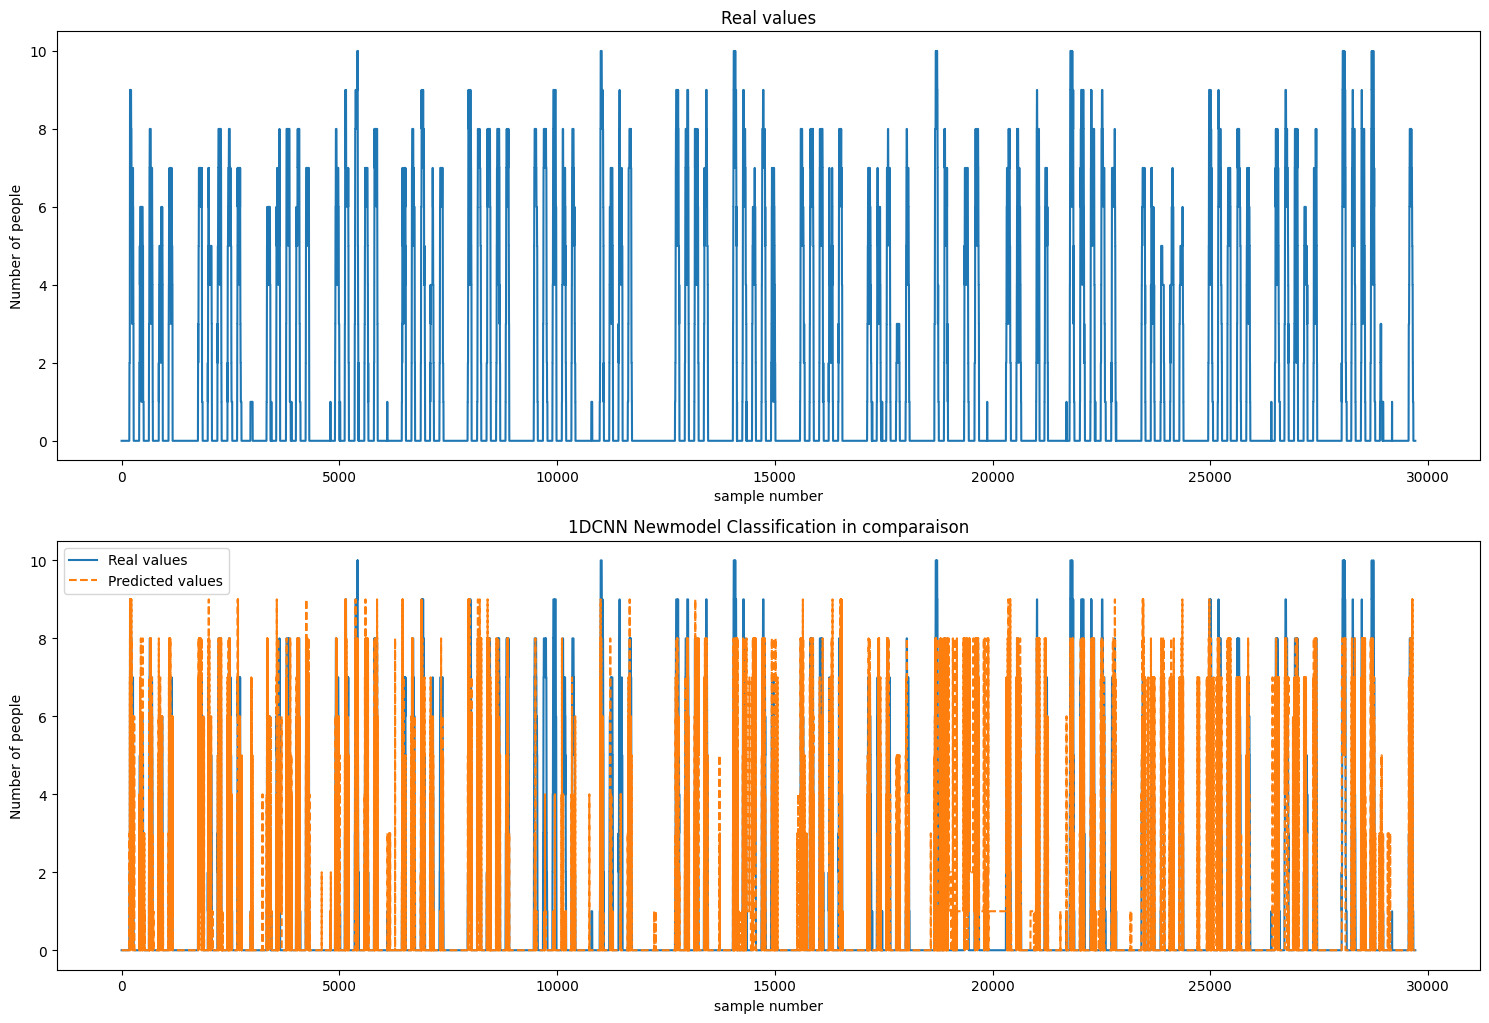

In [9]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
plt.plot(y_validation_cat)
plt.title('Real values')
plt.xlabel('sample number')
plt.ylabel('Number of people')

plt.subplot(3, 1, 2)
sns.lineplot(data=y_validation_cat, label='Real values')
sns.lineplot(data=y_pred_Newmodel_cat, label='Predicted values',linestyle='--')
plt.title('1DCNN Newmodel Classification in comparaison')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.tight_layout()
plt.show()

As shown on the above figure, overall the model can adapt for unseen before values. This 'Newmodel' was trainned on values from february values.

In [10]:
# Plot the model architecture to a file
a = plot_model(Newmodel, to_file='Newmodel.png', show_shapes=True, show_layer_names=True)

## Basic Regression model

In [11]:
CNNregModel = tf.keras.models.load_model('Models/Reg/1DCNN_reg_model_1.keras')

In [12]:
loaded_loss  = CNNregModel.evaluate(X, y_reg)
print(f'Loaded model loss: {loaded_loss:.4f}')

CNNregModel_predictions = CNNregModel.predict(X)

929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.3721
Loaded model loss: 6.8850
929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [13]:
# Calculate additional metrics
mae = mean_absolute_error(y_reg, CNNregModel_predictions)
mse = mean_squared_error(y_reg, CNNregModel_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg, CNNregModel_predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 1.5362128627327147
Mean Squared Error (MSE): 6.885044045437235
Root Mean Squared Error (RMSE): 2.623936745700482
R-squared (R2): 0.14862329119447248


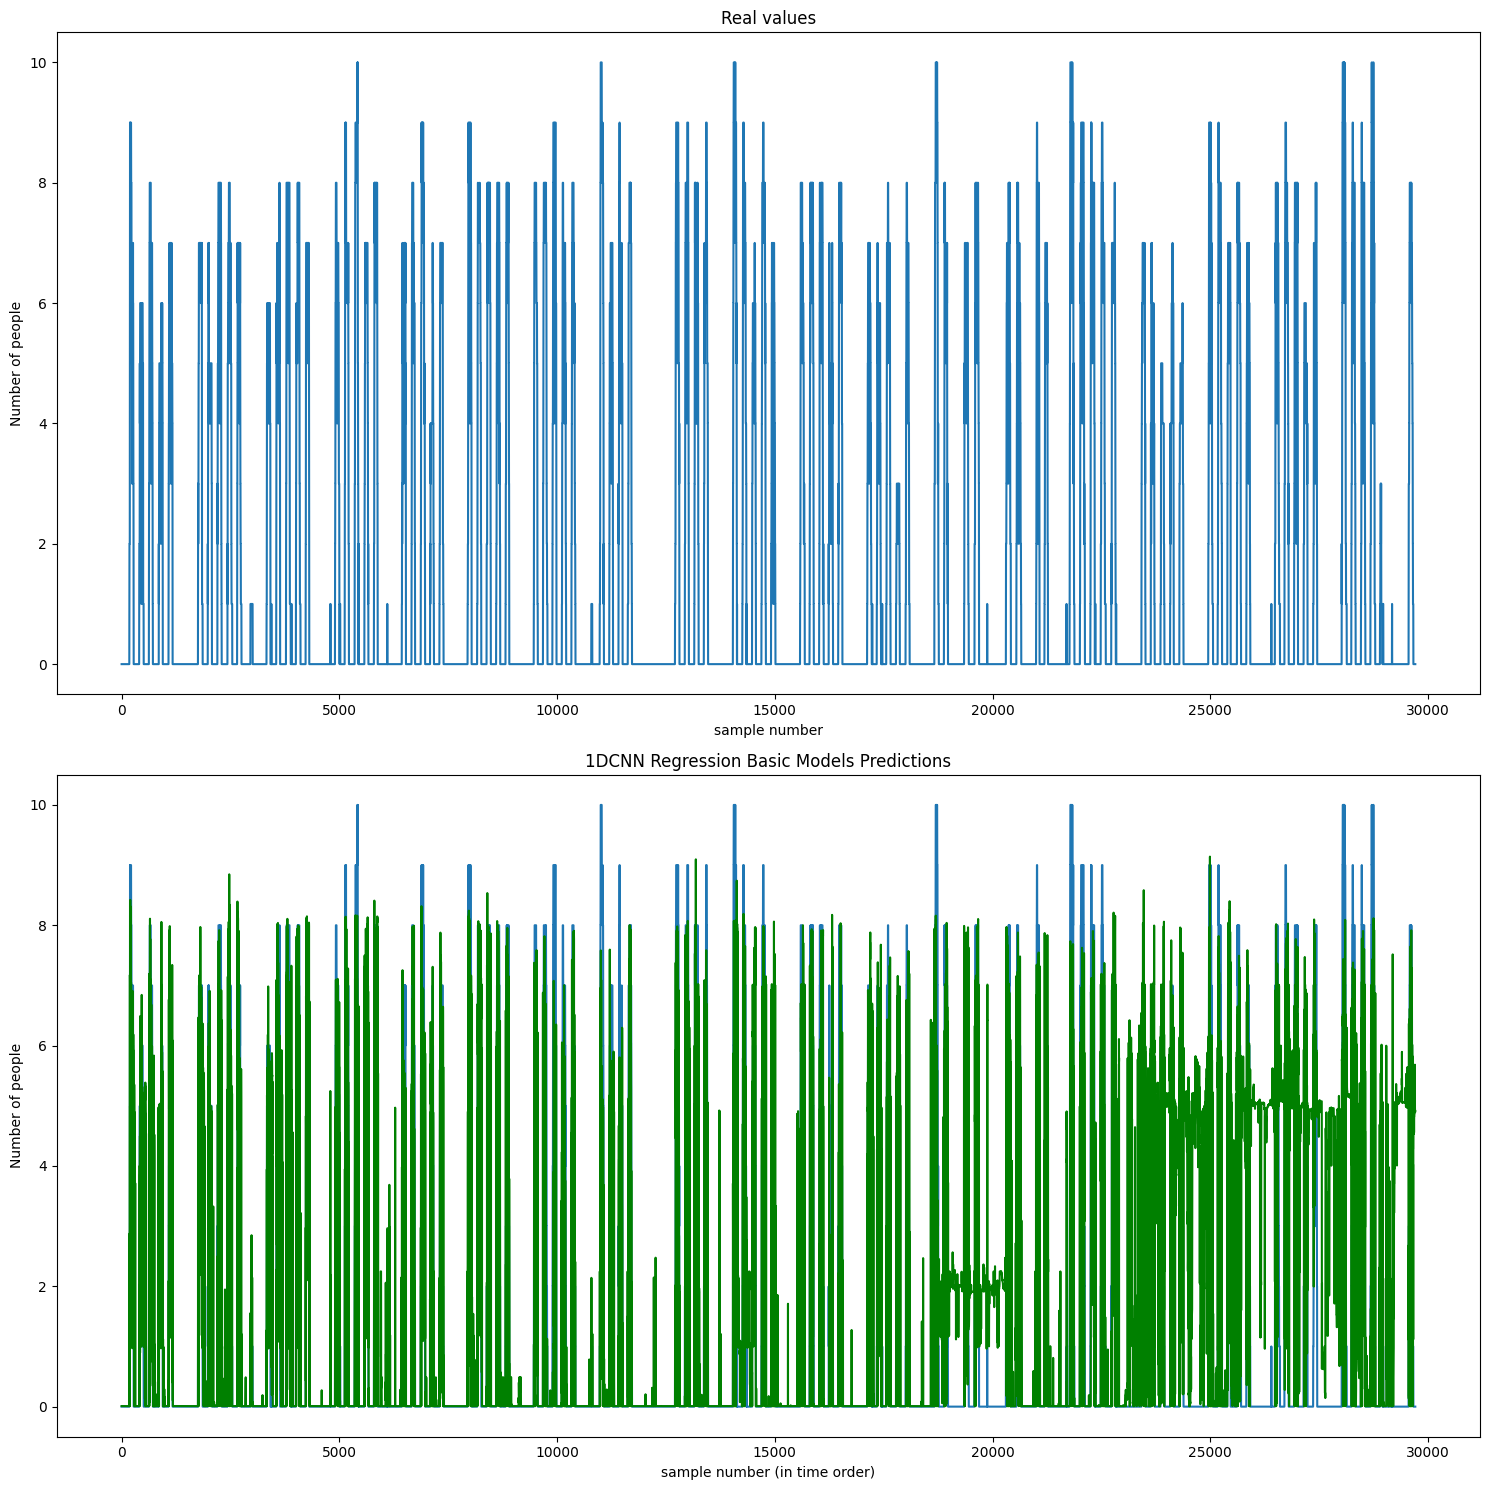

In [14]:
#plot regression 1:
plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(y_validation_cat)
plt.title('Real values')
plt.xlabel('sample number')
plt.ylabel('Number of people')

plt.subplot(2, 1, 2)
plt.plot(y_validation_cat,label='Real values')
plt.plot(CNNregModel_predictions,color='g',label='Predicted values')
plt.title('1DCNN Regression Basic Models Predictions')
plt.xlabel('sample number (in time order)')
plt.ylabel('Number of people')

plt.tight_layout()
plt.show()

From this, we can see a lot of deviation from the correct values near the month of May-June. This Regressions models could be upgrade with a year wide of trainning.

In [15]:
# Plot the model architecture to a file
a = plot_model(CNNregModel, to_file='CNNregModel.png', show_shapes=True, show_layer_names=True)

## Depths models

In [16]:
CNN_depth = tf.keras.models.load_model('Models/Cla/1DCNN_deepmodel.keras')
CNN_depth1024 = tf.keras.models.load_model('Models/Cla/1DCNN_deepmodel_1024.keras')
CNN_depth1024_2500 = tf.keras.models.load_model('Models/Cla/1DCNN_deepmodel_1024_2500epoch.keras')

In [17]:
# Plot the model architecture to a file
a = plot_model(CNN_depth, to_file='CNN_depth.png', show_shapes=True, show_layer_names=True)
a = plot_model(CNN_depth1024, to_file='CNN_depth1024.png', show_shapes=True, show_layer_names=True)
a = plot_model(CNN_depth1024_2500, to_file='CNN_depth1024_2500.png', show_shapes=True, show_layer_names=True)

### 11th depth layers

In [18]:
# # Evaluate the model
CNN_depth_loss, CNN_depth_accuracy = CNN_depth.evaluate(X, y)
print(f'Loaded model validation accuracy: {CNN_depth_accuracy:.4f}')

y_pred_CNN_depth = CNN_depth.predict(X)
y_pred_CNN_depth_cat = np.argmax(y_pred_CNN_depth, axis=1)
y_validation_cat = np.argmax(y, axis=1)

929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6605 - loss: 2.9723
Loaded model validation accuracy: 0.6585
929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


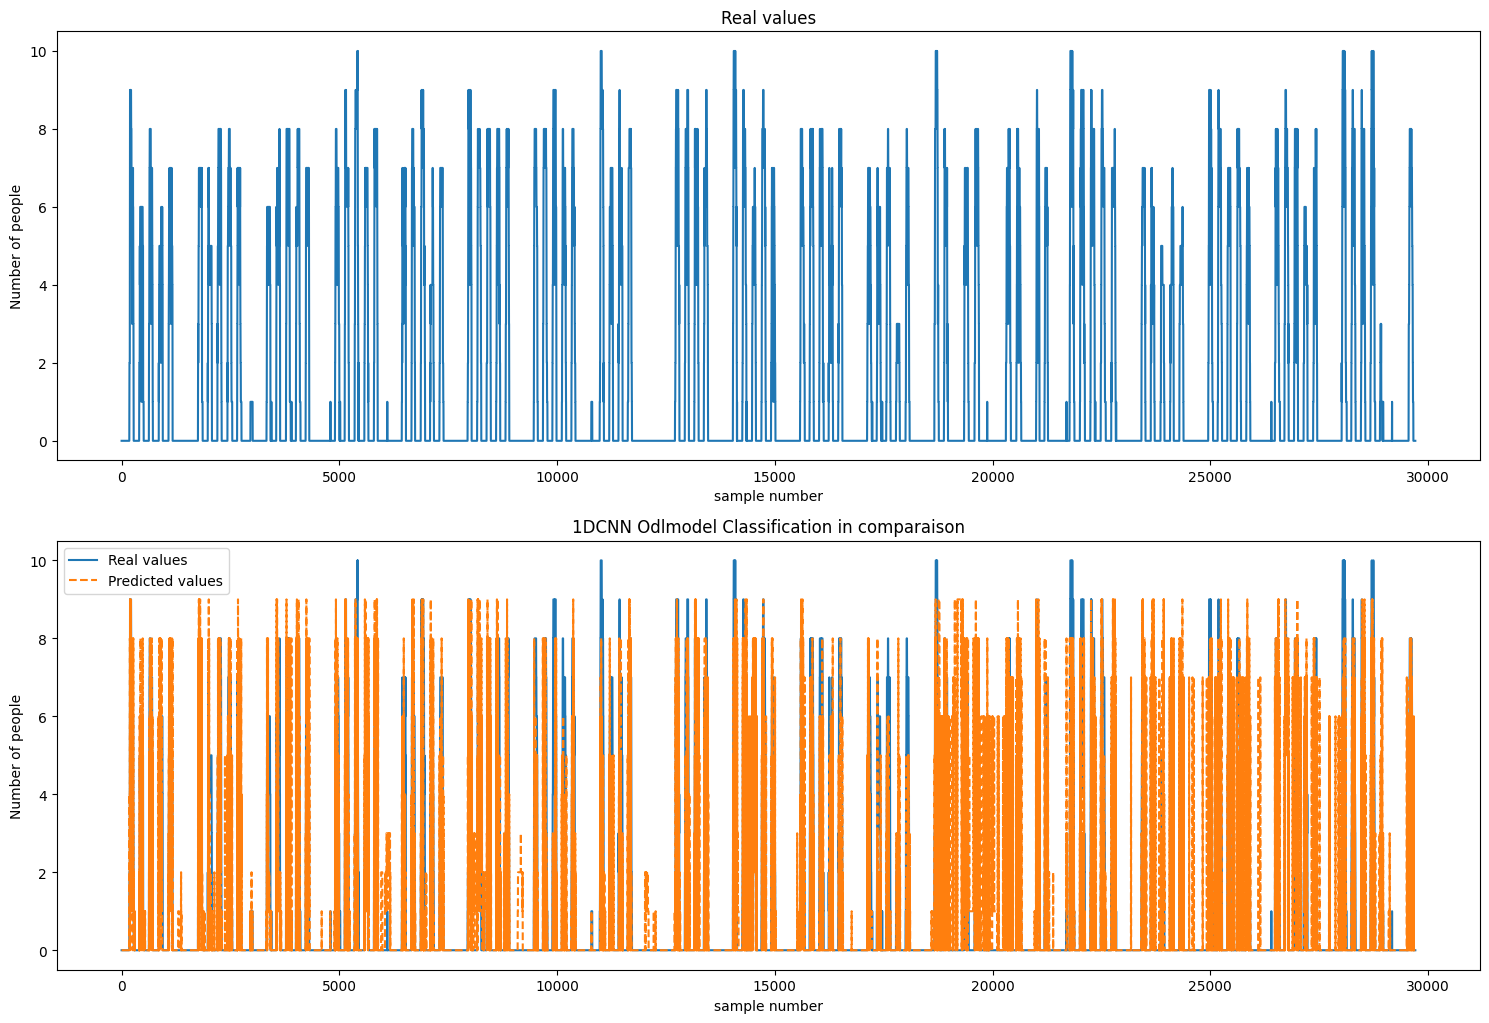

In [19]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
plt.plot(y_validation_cat)
plt.title('Real values')
plt.xlabel('sample number')
plt.ylabel('Number of people')

plt.subplot(3, 1, 2)
sns.lineplot(data=y_validation_cat, label='Real values')
sns.lineplot(data=y_pred_CNN_depth_cat, label='Predicted values',linestyle='--')
plt.title('1DCNN Odlmodel Classification in comparaison')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
# # Evaluate the model
CNN_depth1024_loss, CNN_depth1024_accuracy = CNN_depth1024.evaluate(X, y)
print(f'Loaded model validation accuracy: {CNN_depth1024_accuracy:.4f}')

y_pred_CNN_depth1024 = CNN_depth1024.predict(X)
y_pred_CNN_depth1024_cat = np.argmax(y_pred_CNN_depth1024, axis=1)
y_validation_cat = np.argmax(y, axis=1)

929/929 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6468 - loss: 3.7308
Loaded model validation accuracy: 0.6379
929/929 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


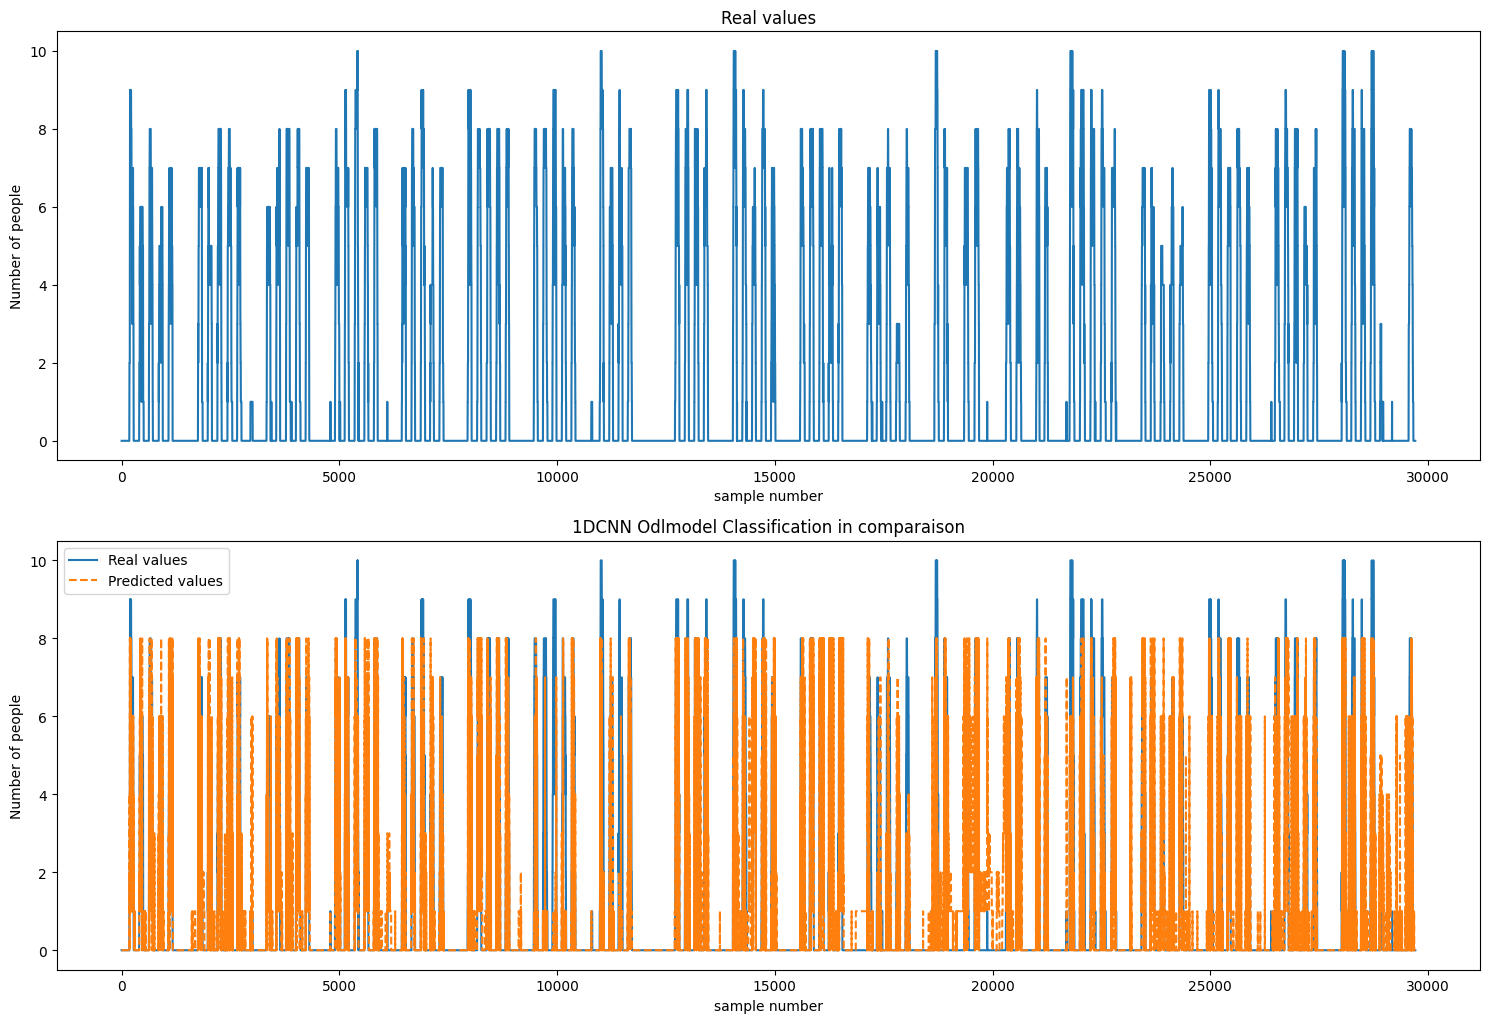

In [21]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
plt.plot(y_validation_cat)
plt.title('Real values')
plt.xlabel('sample number')
plt.ylabel('Number of people')

plt.subplot(3, 1, 2)
sns.lineplot(data=y_validation_cat, label='Real values')
sns.lineplot(data=y_pred_CNN_depth1024_cat, label='Predicted values',linestyle='--')
plt.title('1DCNN Odlmodel Classification in comparaison')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.tight_layout()
plt.show()

Factually, from the numbers the accuracy are the same from the depths and depths+nb of neuronnes. But from the graph it seems like on a macroscale the depth and depth+nb of neuronnes perform better than the 'Newmodel'.

In [22]:
# # Evaluate the model
CNN_depth1024_2500_loss, CNN_depth1024_2500_accuracy = CNN_depth1024_2500.evaluate(X, y)
print(f'Loaded model validation accuracy: {CNN_depth1024_2500_accuracy:.4f}')

y_pred_CNN_depth1024_2500 = CNN_depth1024_2500.predict(X)
y_pred_CNN_depth1024_2500_cat = np.argmax(y_pred_CNN_depth1024_2500, axis=1)
y_validation_cat = np.argmax(y, axis=1)

929/929 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6952 - loss: 2.7050
Loaded model validation accuracy: 0.6574
929/929 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


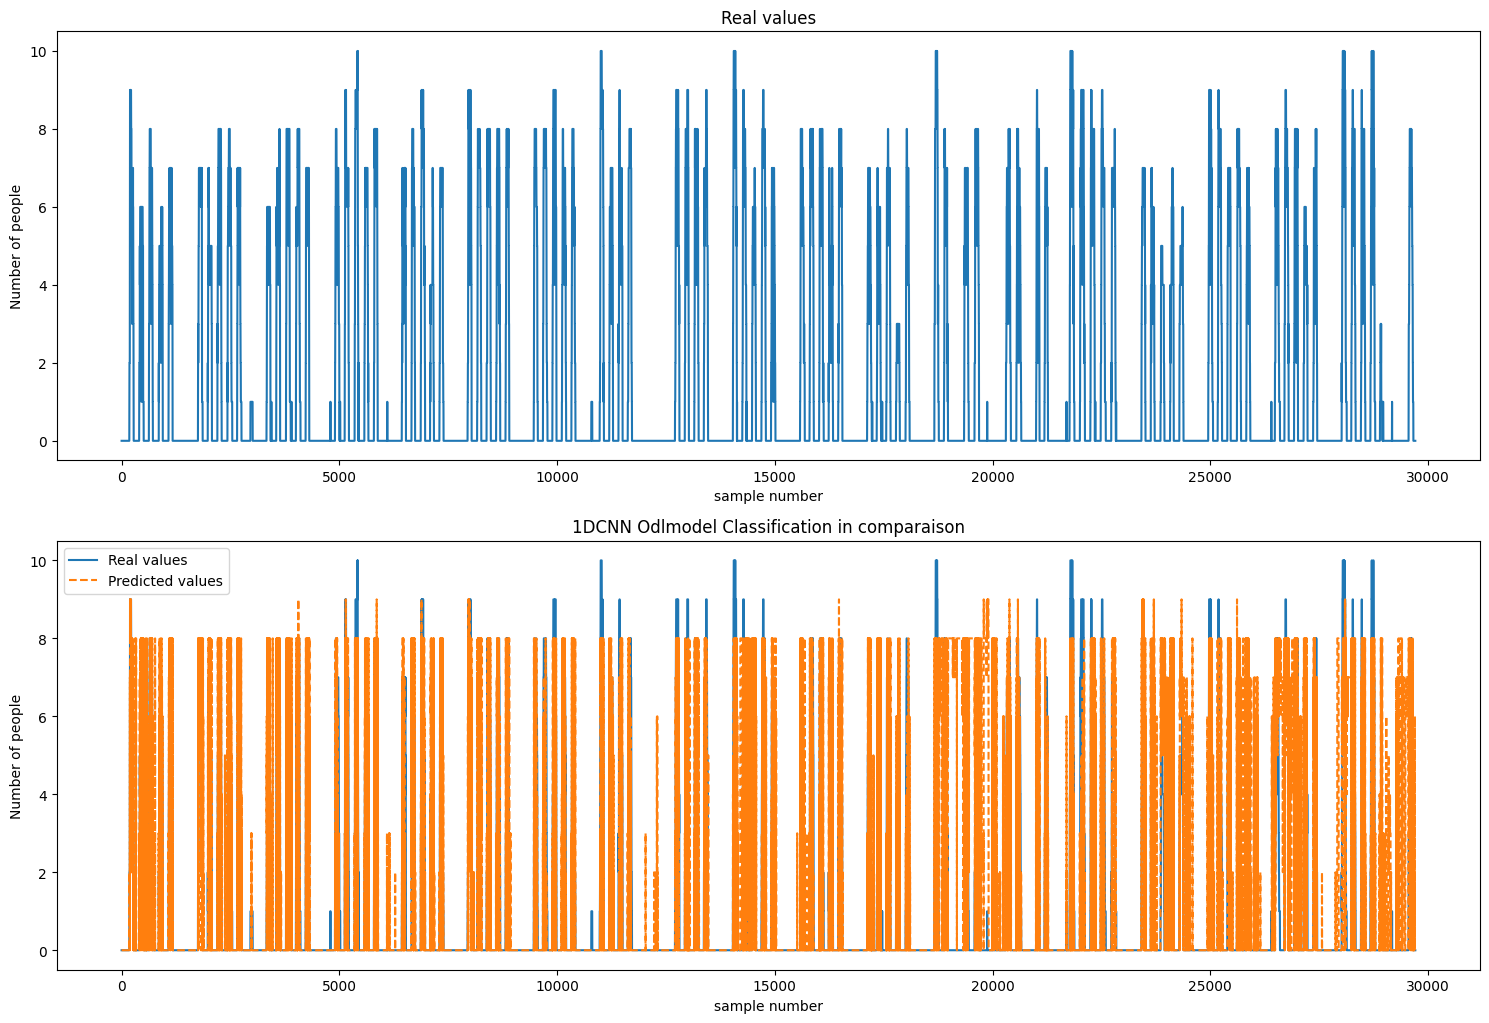

In [23]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
plt.plot(y_validation_cat)
plt.title('Real values')
plt.xlabel('sample number')
plt.ylabel('Number of people')

plt.subplot(3, 1, 2)
sns.lineplot(data=y_validation_cat, label='Real values')
sns.lineplot(data=y_pred_CNN_depth1024_2500_cat, label='Predicted values',linestyle='--')
plt.title('1DCNN Odlmodel Classification in comparaison')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.tight_layout()
plt.show()

The overtrainning from the 2500 epoch made the models do poorly on new data.

# Results

In [24]:

# real values
y_validation_cat

# Regression CNN
CNNregModel_predictions

# Classification models
y_pred_Newmodel_cat

y_pred_CNN_depth_cat
y_pred_CNN_depth1024_cat
y_pred_CNN_depth1024_2500_cat


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
basic_regression = []
for x in CNNregModel_predictions:
    y = x[0]
    basic_regression.append(y)
print(basic_regression)

[0.00957787, 0.00957787, 0.009563267, 0.009539545, 0.009539545, 0.009539545, 0.00957787, 0.00957787, 0.00957787, 0.009538233, 0.0095234215, 0.0095234215, 0.009528577, 0.009546787, 0.009546787, 0.009546787, 0.009546787, 0.009546787, 0.009546787, 0.009548724, 0.009542108, 0.009542108, 0.009542108, 0.009542108, 0.009542108, 0.009542108, 0.009512156, 0.009502828, 0.009515554, 0.009515554, 0.009515554, 0.009515554, 0.009515554, 0.009520978, 0.009523034, 0.00953275, 0.00953275, 0.00953275, 0.00953275, 0.009520978, 0.009528786, 0.00953275, 0.00953275, 0.00953275, 0.009520978, 0.009562254, 0.00957492, 0.00957492, 0.00957492, 0.00957492, 0.00957939, 0.009558916, 0.009597719, 0.0095847845, 0.0095847845, 0.009591103, 0.00958997, 0.00958997, 0.00958997, 0.009591103, 0.0095847845, 0.009607583, 0.009608984, 0.00958997, 0.009611547, 0.009607583, 0.00958997, 0.00958997, 0.00958997, 0.009609997, 0.009607583, 0.009607583, 0.009607285, 0.009558916, 0.009558916, 0.009558916, 0.00957492, 0.00957492, 0.0095

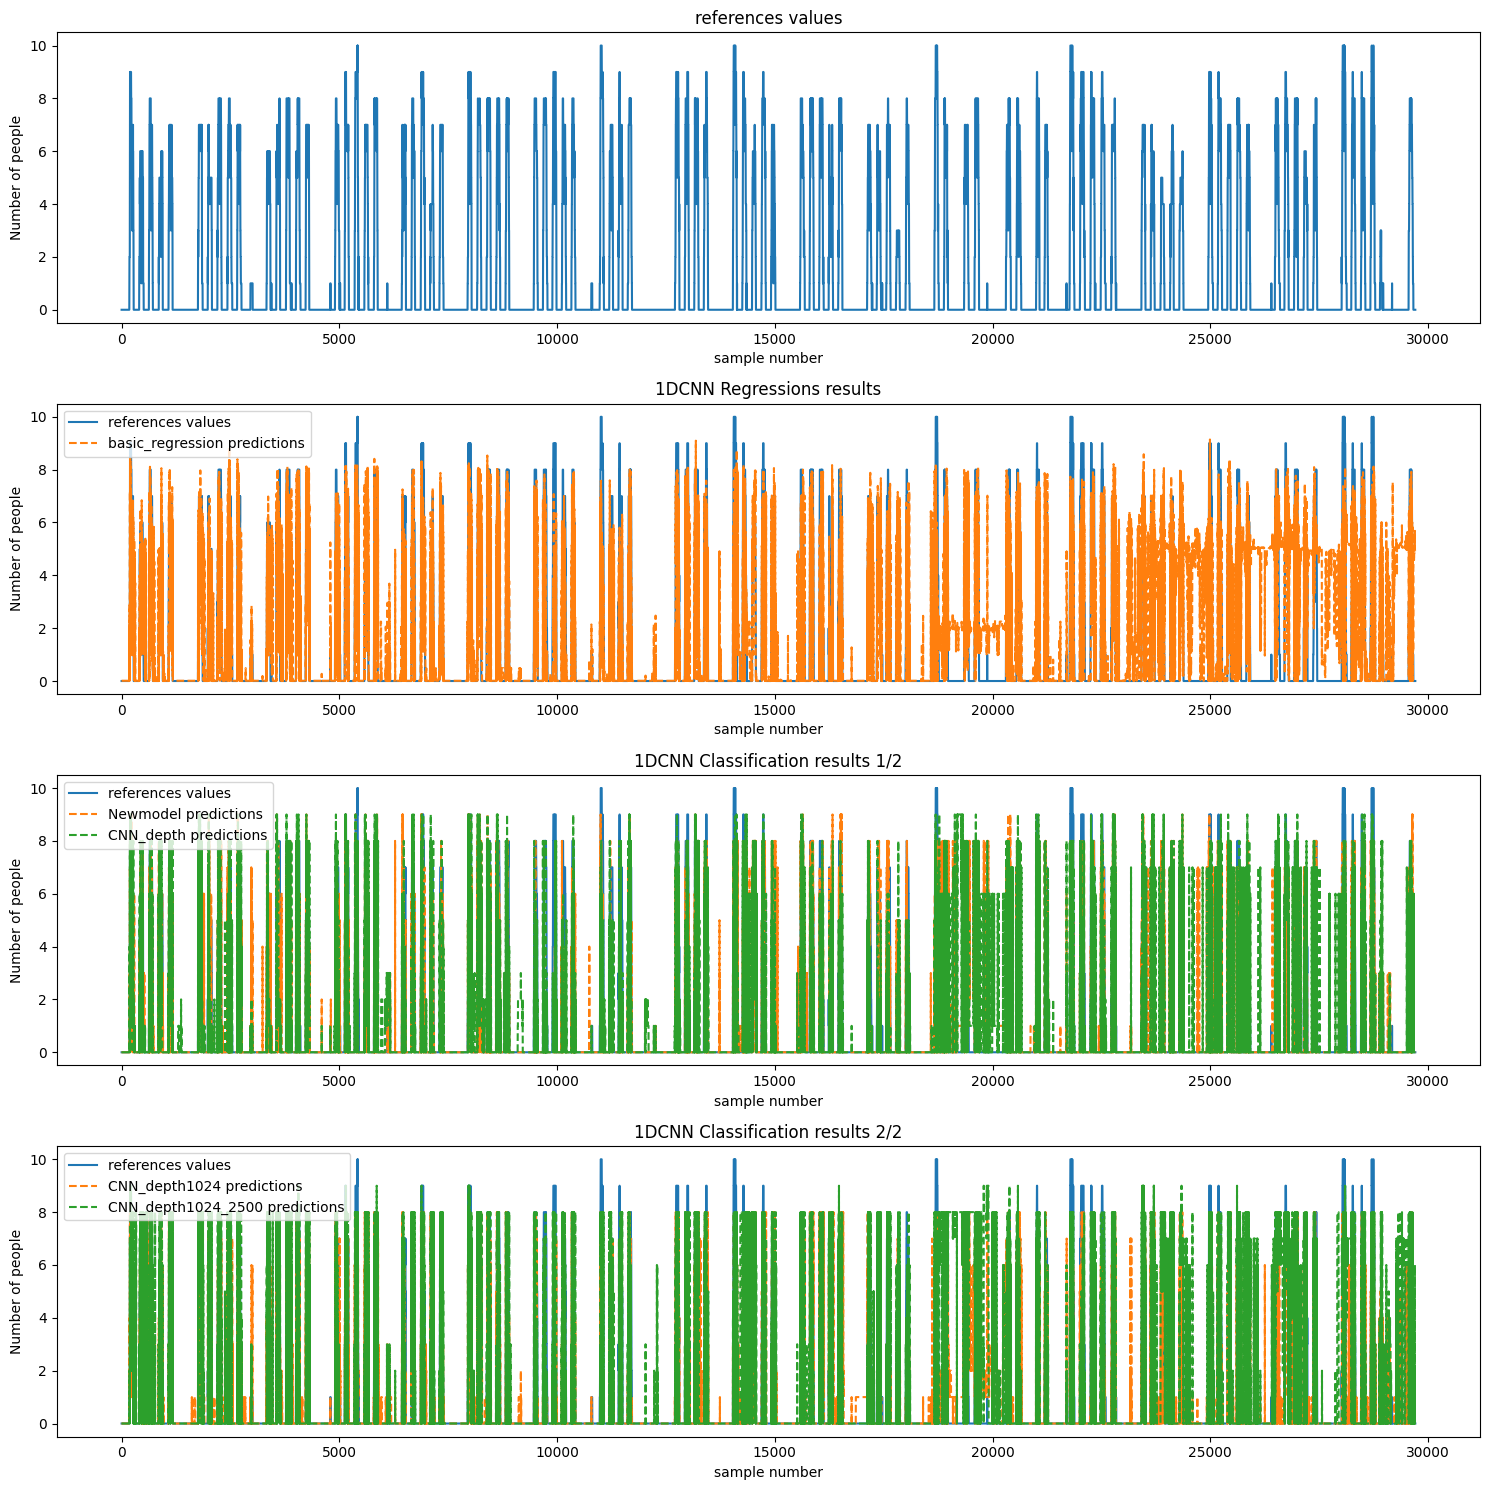

In [26]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(4, 1, 1)
plt.plot(y_validation_cat)
plt.title('references values')
plt.xlabel('sample number')
plt.ylabel('Number of people')

plt.subplot(4, 1, 2)
sns.lineplot(data=y_validation_cat, label='references values')
sns.lineplot(data=basic_regression, label='basic_regression predictions',linestyle='--')
plt.title('1DCNN Regressions results')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.subplot(4, 1, 3)
sns.lineplot(data=y_validation_cat, label='references values')
sns.lineplot(data=y_pred_Newmodel_cat, label='Newmodel predictions',linestyle='--')
sns.lineplot(data=y_pred_CNN_depth_cat, label='CNN_depth predictions',linestyle='--')
plt.title('1DCNN Classification results 1/2')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.subplot(4, 1, 4)
sns.lineplot(data=y_validation_cat, label='references values')
sns.lineplot(data=y_pred_CNN_depth1024_cat, label='CNN_depth1024 predictions',linestyle='--')
sns.lineplot(data=y_pred_CNN_depth1024_2500_cat, label='CNN_depth1024_2500 predictions',linestyle='--')
plt.title('1DCNN Classification results 2/2')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.tight_layout()
plt.show()

## Metrics

In [27]:
accuracy = accuracy_score(y_validation_cat, y_pred_Newmodel_cat)
f1 = f1_score(y_validation_cat, y_pred_Newmodel_cat, average='macro')

print('Newmodel metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Newmodel metrics:
Accuracy: 0.6699542210852296
F1 Score: 0.15769477878797025


In [28]:
ypred = y_pred_CNN_depth_cat
accuracy = accuracy_score(y_validation_cat, ypred)
f1 = f1_score(y_validation_cat, ypred, average='macro')

print('CNN_depth metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

CNN_depth metrics:
Accuracy: 0.6584758314258785
F1 Score: 0.1513081921523451


In [29]:
ypred = y_pred_CNN_depth1024_cat
accuracy = accuracy_score(y_validation_cat, ypred)
f1 = f1_score(y_validation_cat, ypred, average='macro')

print('CNN_depth1024 metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

CNN_depth1024 metrics:
Accuracy: 0.6379089807459271
F1 Score: 0.14753298546278024


In [30]:
ypred = y_pred_CNN_depth1024_2500_cat
accuracy = accuracy_score(y_validation_cat, ypred)
f1 = f1_score(y_validation_cat, ypred, average='macro')

print('CNN_depth1024_2500 metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

CNN_depth1024_2500 metrics:
Accuracy: 0.6573650195233607
F1 Score: 0.15278789443305366


In [31]:
# Calculate additional metrics
mae = mean_absolute_error(y_reg_validation, basic_regression)
mse = mean_squared_error(y_reg_validation, basic_regression)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg_validation, basic_regression)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 1.5362128627327147
Mean Squared Error (MSE): 6.885044045437235
Root Mean Squared Error (RMSE): 2.623936745700482
R-squared (R2): 0.14862329119447248


## Creating output file

In [32]:
data_date = pd.read_csv('Merged sensors+interpolated+Presence+Gradient+each room presence.csv')

# Handle missing values by dropping them
data_date = data_date.dropna()

# data_date= data_date.reset_index(drop=True)

date_series = data_date['Datetime']

split_index = int(len(data_date) * 1)
# X_validation = X[-split_index:]
date_series_validation = date_series[-split_index:]
# date_series_validation = date_series[3495:5293]
len(date_series_validation)

29708

In [33]:
date_series_validation = date_series_validation.apply(lambda x: f"{x}"+"0" if len(x) <= 15 else x)

datetime_objects = [datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S') for date_str in date_series_validation]

In [34]:
# Transpose the data (convert columns to rows)
rows = list(zip(datetime_objects, y_validation_cat, y_pred_Newmodel_cat,y_pred_CNN_depth_cat,y_pred_CNN_depth1024_cat,y_pred_CNN_depth1024_2500_cat,basic_regression))

In [39]:
# Open a file for writing (create 'output.csv')
header = ['Datetime', 'Real values','Small 1DCNN Classification New model predictions','Deep 1DCNN Classification model 11th layers','Deep 1DCNN Classification model 11th layers + 1024 neurones per layers','Deep 1DCNN Classification model 11th layers + 1024 neurones per layers + 2500 epoch', 'Basic Regression CNN model']
with open('outputFourmonths.csv', mode='w', newline='') as file:
    writer = csv.writer(file)

    writer.writerow(header)

    for row in rows:
        writer.writerow(row)

print("CSV file created successfully.")

CSV file created successfully.


## side note


In [36]:
ztrue_yes = [1 if y > 0 else 0 for y in y_validation_cat]
zpredicted_cla = [1 if y > 0 else 0 for y in y_pred_Newmodel_cat]
zpredicted_reg = [x if x < 1 else 1 for x in basic_regression]

In [37]:
accuracy = accuracy_score(ztrue_yes, zpredicted_cla)
f1 = f1_score(ztrue_yes, zpredicted_cla, average='macro')

print('Newmodel metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Newmodel metrics:
Accuracy: 0.812272788474485
F1 Score: 0.7573582370819578


In [38]:
# Calculate additional metrics
mae = mean_absolute_error(ztrue_yes, zpredicted_reg)
mse = mean_squared_error(ztrue_yes, zpredicted_reg)
rmse = np.sqrt(mse)
r2 = r2_score(ztrue_yes, zpredicted_reg)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.2702278195196564
Mean Squared Error (MSE): 0.25512865487804925
Root Mean Squared Error (RMSE): 0.5051026181659023
R-squared (R2): -0.2070267110747399
